# **EDA Analysis**

In [15]:
# Mohammad Salem 1200651 , Majd abdeddin 1202923
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file
cars_df = pd.read_csv('cars.csv')

# Printing the first 5 rows
cars_df.head()


,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [16]:
# Dataset information
print("Dataset Information:")
print(cars_df.info())

# Statistical summary
print("\nStatistical Summary:")
print(cars_df.describe())

# Checking for null values
print("\nMissing Values:")
print(cars_df.isnull().sum())

# Unique values for each column
print("\nUnique Values:")
for column in cars_df.columns:
    print(f"{column}: {cars_df[column].nunique()} unique values")

# Sample distribution
print("\nSample Distribution:")
print(cars_df['price'].value_counts().head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB
None

Statistical Summary:
                                car name price engine_capacity cylinder  \
count                               6308  6308            6308     5684   
unique                              2546  3395             129       10   
top     Mercedes-Benz C-Class 2022 C 300   TBD               2        4   
freq     

# **Preprocessing**

In [40]:
import pandas as pd
import re

# Load the dataset
cars_df = pd.read_csv('cars.csv')

# Get unique values in the 'price' column
unique_prices = cars_df['price'].unique()

# Initialize lists for analysis
valid_prices = []
currencies = set()
noise_values = []

# Regular expression to identify prices with currencies
price_pattern = r'([A-Z]{3})\s?([\d,]+)'  # Matches formats like "SAR 140,248" or "USD123,456"

for value in unique_prices:
    if isinstance(value, str):  # Ensure it's a string
        match = re.match(price_pattern, value)
        if match:
            currencies.add(match.group(1))  # Extract currency (e.g., SAR, EGP)
            valid_prices.append(value)     # Add valid price to the list
        else:
            noise_values.append(value)    # Add noise to a separate list

# Output results
print("Unique Prices in 'price' Column:")
print(unique_prices)
print("\nValid Prices (with currencies):")
print(valid_prices)
print("\nUnique Currencies:")
print(currencies)
print("\nNoise/Invalid Values:")
print(noise_values)

print("\nNoisy data persentage :")
print(   "Noisy prices "+ str(len(noise_values)) )
print(   "valid_prices "+ str(len(valid_prices)) )
print( "Noisy prices from valid prices% :"+ str(  len(noise_values)  /   len(valid_prices) ) +" %" )
print( "Noisy prices from all data% :"+ str(  len(noise_values)  /  ( len(valid_prices)+len(noise_values))  )+" %"  )


Unique Prices in 'price' Column:
['TBD' 'SAR 140,575' 'SAR 98,785' ... 'AED 1,990,000' 'AED 1,766,100'
 'AED 1,650,000']

Valid Prices (with currencies):
['SAR 140,575', 'SAR 98,785', 'SAR 198,000', 'SAR 95,335', 'SAR 82,845', 'SAR 76,545', 'SAR 116,900', 'SAR 238,000', 'SAR 91,885', 'SAR 72,335', 'SAR 111,515', 'SAR 1,095,650', 'SAR 73,485', 'SAR 1,043,477', 'SAR 179,314', 'SAR 1,386,462', 'SAR 64,400', 'SAR 187,220', 'SAR 963,375', 'SAR 200,200', 'SAR 78,101', 'SAR 76,527', 'SAR 74,572', 'SAR 81,631', 'SAR 142,285', 'SAR 87,551', 'SAR 99,392', 'SAR 85,850', 'SAR 101,950', 'SAR 89,942', 'SAR 98,936', 'SAR 239,085', 'SAR 394,300', 'SAR 382,700', 'SAR 275,425', 'SAR 156,200', 'SAR 82,610', 'SAR 295,090', 'SAR 221,145', 'SAR 48,549', 'SAR 82,698', 'SAR 79,233', 'SAR 194,750', 'SAR 190,000', 'SAR 225,380', 'SAR 60,000', 'SAR 80,300', 'SAR 241,080', 'SAR 121,679', 'SAR 76,820', 'SAR 131,890', 'SAR 105,685', 'SAR 72,419', 'SAR 142,890', 'SAR 126,385', 'SAR 49,419', 'SAR 105,000', 'SAR 121,9

In [42]:
import pandas as pd
import re



# Exchange rates for conversion to USD
exchange_rates = {
    'SAR': 0.27, 'AED': 0.27, 'EGP': 0.032, 'OMR': 2.60,
    'BHD': 2.65, 'KWD': 3.25, 'QAR': 0.27
}

# Regular expression to extract price and currency
price_pattern = r'([A-Z]{3})\s?([\d,]+)'


# Lists to store cleaned prices and noise
cleaned_prices = []
noisy_indices = []

# Iterate through the price column
for idx, value in enumerate(cars_df['price']):
    if isinstance(value, str):
        match = re.match(price_pattern, value)
        if match:
            currency, numeric_value = match.groups()
            numeric_value = int(numeric_value.replace(',', ''))  # Remove commas and convert to int
            usd_value = numeric_value * exchange_rates.get(currency, 0)  # Convert to USD
            cleaned_prices.append(round(usd_value))  # Store rounded value in USD

        else:
            noisy_indices.append(idx)  # Mark noisy data indices
    else:
        noisy_indices.append(idx)  # Handle non-string noise



# Calculate the median of the cleaned prices
median_price_usd = int(pd.Series(cleaned_prices).median())

# Replace noise with median price
for idx in noisy_indices:
    cleaned_prices.insert(idx, median_price_usd)

# Update the 'price' column with cleaned and converted prices
cars_df['price'] = cleaned_prices

# Display results
print("\nCleaned and Converted 'price' Column (first 10 values):")
print(cars_df['price'].head(10))

print("\nSummary Statistics of Cleaned Prices:")
print(cars_df['price'].describe())



Cleaned and Converted 'price' Column (first 10 values):
0    47250
1    37955
2    26672
3    53460
4    47250
5    25740
6    22368
7    20667
8    31563
9    64260
Name: price, dtype: int64

Summary Statistics of Cleaned Prices:
count    6.308000e+03
mean     6.677835e+04
std      9.564086e+04
min      4.608000e+03
25%      2.943000e+04
50%      4.725000e+04
75%      6.944025e+04
max      3.594996e+06
Name: price, dtype: float64


In [ ]:
# Get unique values in the 'engine_capacity' column
unique_engine_capacity = cars_df['engine_capacity'].unique()
print("Unique engine_capacity in 'price' Column:")
print(unique_engine_capacity)

Unique engine_capacity in 'price' Column:
['0' '2' '1.5' '2.3' '1.8' '2.5' '2.7' '5.2' '4' '3.5' '3.8' '1.6' '3'
 '6.2' '3.7' '6.5' '1.7' '1.4' '2.2' '2.4' '5' '6.7' '4.4' '5.7' '3.6'
 '1.2' '3.3' '2.9' '2.8' '6' '3.9' '1.3' '1' '3.2' '5.3' '4.5' '4.8' '6.4'
 '4.6' '5.6' '4.7' '5.5' '8' '6.3' '6.6' '5.9' '6.8' '2359' '1600' '1498'
 '5200' '3982' '1991' '1598' 'Cylinders' '1500' '1800' '1497' '2500'
 '1969' '2000' '1400' '4395' '1984' '1591' '2998' '2995' '1988' '2497'
 '1300' '1499' '3995' '1489' '1998' '1490' '2891' '1995' '4400' '1197'
 '1200' '1199' '1561' '1332' '3000' '1798' '1997' '1000' '1590' '1396'
 '1248' '1485' '999' '1395' '1587' '1368' '1586' '1299' '1597' '5300'
 '1496' '140' '2693' '3342' '2476' '1595' '3498' '3470' '3828' '2987'
 '4000' '2979' '4999' '5700' '5935' '4691' '3600' '3993' '5950' '6000'
 '2894' '2981' '6752' '3400' '3996' '1.9' '4.2' '3.4' '2.1' '4.1']


In [ ]:
import numpy as np

# Function to clean and normalize engine capacities
def clean_engine_capacity(value):
    try:
        if isinstance(value, str):
            # Check if the value is noise
            if value.lower() == 'cylinders':
                return np.nan
            # Check if the value is numeric (e.g., '5300', '4.2')
            if value.isdigit():  # Large integers (e.g., 1567, 5300)
                cc_value = int(value)
                if cc_value > 100 and cc_value < 10000:  # Convert CC to liters
                    return cc_value / 1000
                else:
                    return np.nan  # Unusually large/small values
            elif '.' in value:  # Floats like '4.1'
                return float(value)
        elif isinstance(value, (int, float)):  # Direct numeric values
            return value
    except:
        pass
    return np.nan  # Default for invalid cases

#############################

# Clean the engine_capacity column
cars_df['engine_capacity'] = cars_df['engine_capacity'].apply(clean_engine_capacity)

# Replace missing/invalid values with the median
median_engine_capacity = cars_df['engine_capacity'].median()
cars_df['engine_capacity'] = cars_df['engine_capacity'].fillna(median_engine_capacity)


# Display cleaned column and unique values
unique_engine_capacity_cleaned = cars_df['engine_capacity'].unique()
print("Cleaned and Normalized 'engine_capacity' Column (Unique Values):")
print(unique_engine_capacity_cleaned)

print("\nSummary Statistics of Cleaned Engine Capacities:")
print(cars_df['engine_capacity'].describe())


Cleaned and Normalized 'engine_capacity' Column (Unique Values):
[2.5   1.5   2.3   1.8   2.7   5.2   3.5   3.8   1.6   6.2   3.7   6.5
 1.7   1.4   2.2   2.4   6.7   4.4   5.7   3.6   1.2   3.3   2.9   2.8
 3.9   1.3   3.2   5.3   4.5   4.8   6.4   4.6   5.6   4.7   5.5   6.3
 6.6   5.9   6.8   2.359 1.498 3.982 1.991 1.598 1.497 1.969 2.    4.395
 1.984 1.591 2.998 2.995 1.988 2.497 1.499 3.995 1.489 1.998 1.49  2.891
 1.995 1.197 1.199 1.561 1.332 3.    1.798 1.997 1.    1.59  1.396 1.248
 1.485 0.999 1.395 1.587 1.368 1.586 1.299 1.597 1.496 0.14  2.693 3.342
 2.476 1.595 3.498 3.47  3.828 2.987 4.    2.979 4.999 5.935 4.691 3.993
 5.95  6.    2.894 2.981 6.752 3.4   3.996 1.9   4.2   2.1   4.1  ]

Summary Statistics of Cleaned Engine Capacities:
count    6308.000000
mean        2.747463
std         1.125265
min         0.140000
25%         2.400000
50%         2.500000
75%         2.700000
max         6.800000
Name: engine_capacity, dtype: float64


In [ ]:
# Define a function to clean numeric columns
def clean_numeric_column(column):
    # Extract numeric values only
    column_cleaned = pd.to_numeric(column, errors='coerce')  # Non-numeric values will be set to NaN

    # Find median of the valid numbers (ignoring NaN)
    median_value = column_cleaned.median()

    # Replace NaN values with the median
    column_cleaned.fillna(median_value, inplace=True)

    # Convert to integers
    column_cleaned = column_cleaned.astype(int)

    return column_cleaned

# Clean the 'horse_power' column
cars_df['horse_power'] = clean_numeric_column(cars_df['horse_power'])

# Clean the 'top_speed' column
cars_df['top_speed'] = clean_numeric_column(cars_df['top_speed'])

# Print cleaned data and summary
print("Cleaned 'horse_power' Column (Unique Values):")
print(cars_df['horse_power'].unique())

print("\nCleaned 'top_speed' Column (Unique Values):")
print(cars_df['top_speed'].unique())

print("\nSummary Statistics for 'horse_power':")
print(cars_df['horse_power'].describe())

print("\nSummary Statistics for 'top_speed':")
print(cars_df['top_speed'].describe())


Cleaned 'horse_power' Column (Unique Values):
[ 255  180  102  420  140  120  170  542  900  198  700  152  503  530
  355  121  400  335  168  231  382  495  224  155  200  275  250  112
  124 1973  254  306  770  320  118  620  139   95  600  103  363  233
  315  105  226  505  128  585  340  422  850  523  462  268  639  395
  354   82  258  440  252  290  100  192  500  123  365  165  136  184
  292  680  550  460  367  211  330  104  245  107  277  379  465  612
  510  562  435  280  476  204  740  147  251  558  650  380  169  189
  702  402  163  350  854  410  225   25  592   78  800  718  156  148
  194  710  755  220  115  630  283  238  185  173   98  160  135  119
   84  110  138  127  150   91  130  132  167  175  113  153  164  205
  215  174  188  227  221  158  212  176  172  197  240  181  298  248
  241  305  228  190  257  310  284  285  235  177  286  161  109  270
  247  213  134  271  300  272  265  230  295  318  517  214  302  232
  328  370  455  208  362  154 

In [ ]:
import re

# Define a function to clean the 'seats' column
def clean_seats_column(column):
    def extract_seats(value):
        # Match the pattern "{number} Seater" and extract the number
        match = re.match(r"(\d+)\s*Seater", str(value))
        if match:
            return int(match.group(1))  # Return the numeric part
        return None  # Return None for invalid entries

    # Apply the extraction function to the column
    column_cleaned = column.apply(extract_seats)

    # Replace invalid entries (None) with the median of valid entries
    median_seats = column_cleaned.median()
    column_cleaned.fillna(median_seats, inplace=True)

    # Convert to integer type
    column_cleaned = column_cleaned.astype(int)

    return column_cleaned

# Clean the 'seats' column
cars_df['seats'] = clean_seats_column(cars_df['seats'])

# Print cleaned data and summary
print("Cleaned 'seats' Column (Unique Values):")
print(cars_df['seats'].unique())

print("\nSummary Statistics for 'seats':")
print(cars_df['seats'].describe())


Cleaned 'seats' Column (Unique Values):
[ 5  4  7  2  6  3  9  8 15 18 14 12 13]

Summary Statistics for 'seats':
count    6308.000000
mean        5.016487
std         1.437801
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        18.000000
Name: seats, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Function to clean and encode a column
def clean_and_label_encode(column, column_name):
    # Check unique values for potential noise
    unique_values = column.unique()
    print(f"Unique values in '{column_name}' before cleaning:")
    print(unique_values)

    # Handle noise (example: replace empty, null, or weird values with 'Unknown')
    column_cleaned = column.fillna('Unknown').str.strip()  # Fill missing and strip extra spaces
    column_cleaned.replace('', 'Unknown', inplace=True)  # Replace empty strings with 'Unknown'

    # Apply label encoding
    encoder = LabelEncoder()
    column_encoded = encoder.fit_transform(column_cleaned)

    print(f"\nUnique values in '{column_name}' after cleaning:\n")
    print(column_cleaned.unique())
    print(f"\nLabel mapping for '{column_name}':\n")
    print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))


    return column_encoded

# Clean and encode each column
cars_df['car_name_encoded'] = clean_and_label_encode(cars_df['car name'], 'car name')
print("\n\n")

cars_df['brand_encoded'] = clean_and_label_encode(cars_df['brand'], 'brand')
print("\n\n")

cars_df['country_encoded'] = clean_and_label_encode(cars_df['country'], 'country')
print("\n\n")

# Print the first few rows to verify
print("\n\n\n\nEncoded DataFrame (Preview):\n")
print(cars_df[['car name', 'car_name_encoded', 'brand', 'brand_encoded', 'country', 'country_encoded']].head())


Unique values in 'car name' before cleaning:
['Fiat 500e 2021 La Prima' 'Peugeot Traveller 2021 L3 VIP'
 'Suzuki Jimny 2021 1.5L Automatic' ...
 'BMW M8 Convertible 2021 4.4T V8 Competition xDrive (625 Hp)'
 'BMW M8 Coupe 2021 4.4T V8 Competition xDrive (625 Hp)'
 'Lamborghini Aventador Ultimae 2022 LP 780-4']

Unique values in 'car name' after cleaning:

['Fiat 500e 2021 La Prima' 'Peugeot Traveller 2021 L3 VIP'
 'Suzuki Jimny 2021 1.5L Automatic' ...
 'BMW M8 Convertible 2021 4.4T V8 Competition xDrive (625 Hp)'
 'BMW M8 Coupe 2021 4.4T V8 Competition xDrive (625 Hp)'
 'Lamborghini Aventador Ultimae 2022 LP 780-4']

Label mapping for 'car name':

{'Abarth 124 Spider 2021 1.4T (170 HP)': 0, 'Abarth 595 2021 1.4T Competizione (Convertible)': 1, 'Abarth 595 2021 1.4T Competizione (Hard-Top)': 2, 'Abarth 695 2021 1.4T Rivale (Convertible)': 3, 'Abarth 695 2021 1.4T Rivale (Hard-Top)': 4, 'Acura MDX 2021 3.5L V6 AWD (A-Spec)': 5, 'Acura MDX 2021 3.5L V6 AWD (Technology Package)': 6, 'Acur

In [ ]:
# Get unique values in the 'cylinder' column
unique_cylinder = cars_df['cylinder'].unique()
print("Unique cylinder in 'cylinder' Column:")
print(unique_cylinder)

Unique cylinder in 'cylinder' Column:
['N/A, Electric' '4' '6' '12' '8' nan '3' '5' '10' '16' 'Drive Type']


In [ ]:
import pandas as pd

# Assuming you have loaded your DataFrame as 'cars_df'
# First, clean the 'cylinder' column by removing the noise and missing values

# Step 1: Replace noise values with median
noise_values = ['N/A, Electric', 'Drive Type']
cars_df['cylinder'] = cars_df['cylinder'].replace(noise_values, pd.NA)

# Step 2: Convert valid numeric values to integers and coerce non-numeric to NaN
cars_df['cylinder'] = pd.to_numeric(cars_df['cylinder'], errors='coerce')

# Step 3: Fill missing (NaN) values with the median value of the column
median_cylinder = cars_df['cylinder'].median()
cars_df['cylinder'] = cars_df['cylinder'].fillna(median_cylinder)
cars_df['cylinder'] = cars_df['cylinder'].astype(int)
# Step 4: Check the unique values after cleaning
print("Cleaned and Normalized 'cylinder' Column (Unique Values):")
print(cars_df['cylinder'].unique())

# Summary statistics of the cleaned 'cylinder' column
print("\nSummary Statistics of Cleaned 'cylinder' Column:")
print(cars_df['cylinder'].describe())


Cleaned and Normalized 'cylinder' Column (Unique Values):
[ 4  6 12  8  3  5 10 16]

Summary Statistics of Cleaned 'cylinder' Column:
count    6308.000000
mean        5.230184
std         1.821152
min         3.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: cylinder, dtype: float64


In [ ]:
# Dataset information
print("Dataset Information:")
print(cars_df.info())

# Statistical summary
print("\nStatistical Summary:")
print(cars_df.describe())

# Checking for null values
print("\nMissing Values:")
print(cars_df.isnull().sum())

# Unique values for each column
print("\nUnique Values:")
for column in cars_df.columns:
    print(f"{column}: {cars_df[column].nunique()} unique values")

# Sample distribution
print("\nSample Distribution:")
print(cars_df['price'].value_counts().head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car name          6308 non-null   object 
 1   price             6308 non-null   int64  
 2   engine_capacity   6308 non-null   float64
 3   cylinder          6308 non-null   int64  
 4   horse_power       6308 non-null   int64  
 5   top_speed         6308 non-null   int64  
 6   seats             6308 non-null   int64  
 7   brand             6308 non-null   object 
 8   country           6308 non-null   object 
 9   car_name_encoded  6308 non-null   int64  
 10  brand_encoded     6308 non-null   int64  
 11  country_encoded   6308 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 591.5+ KB
None

Statistical Summary:
              price  engine_capacity     cylinder  horse_power    top_speed  \
count  6.308000e+03      6308.000000  6308.0

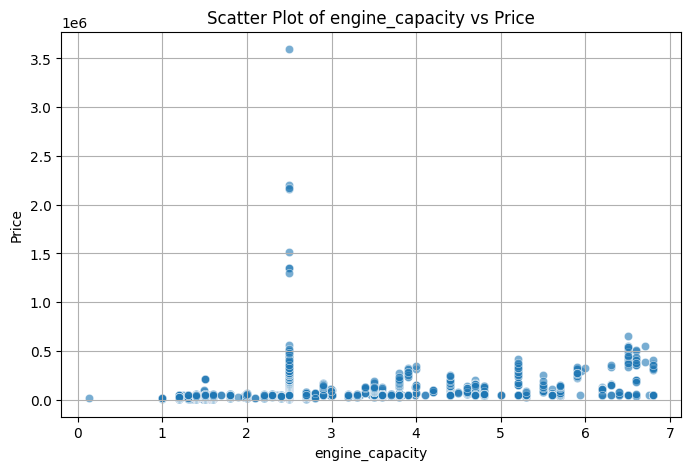

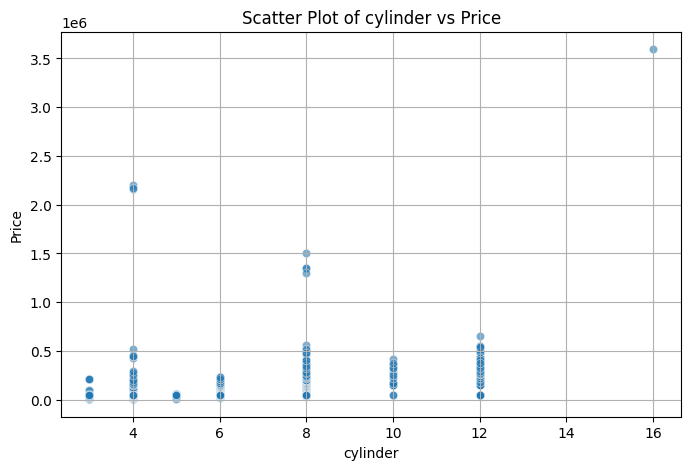

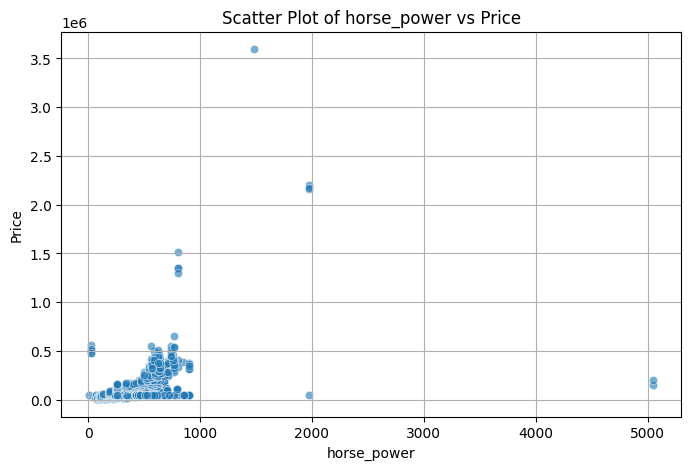

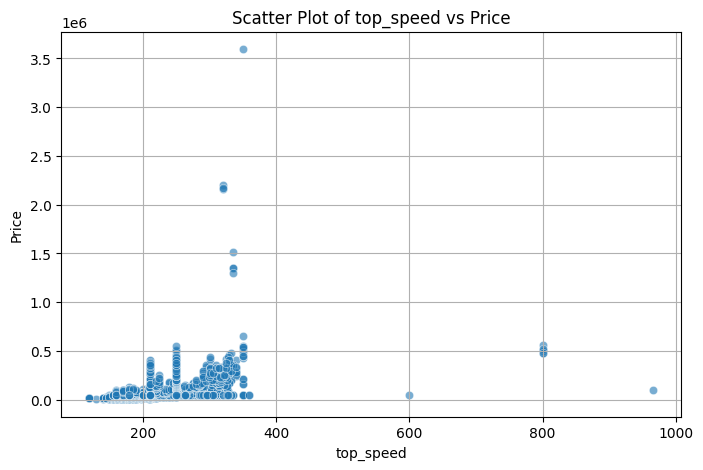

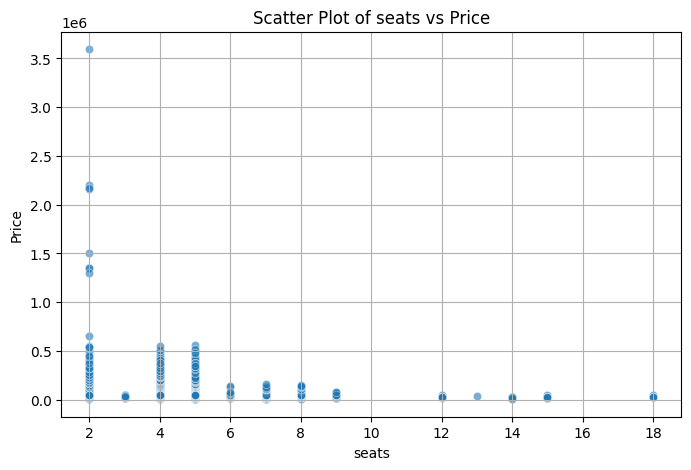

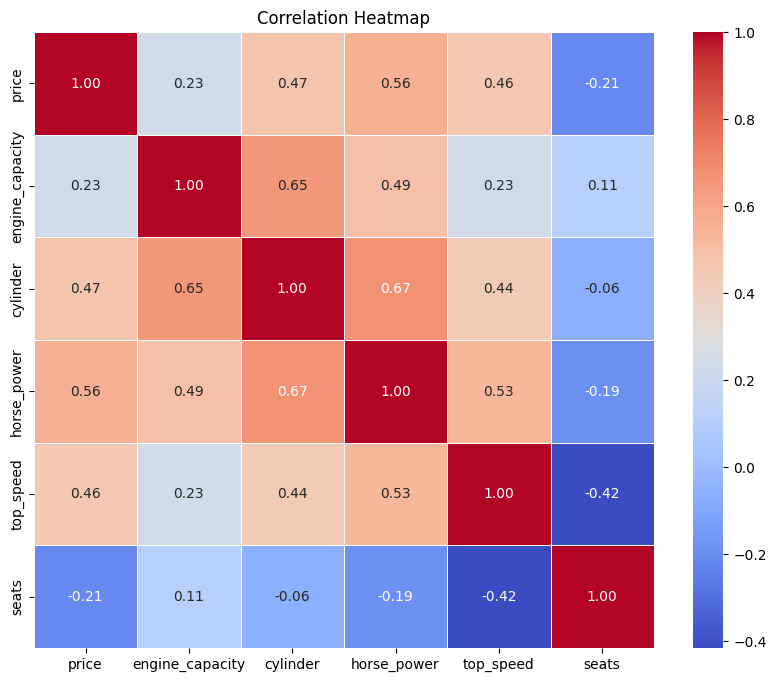

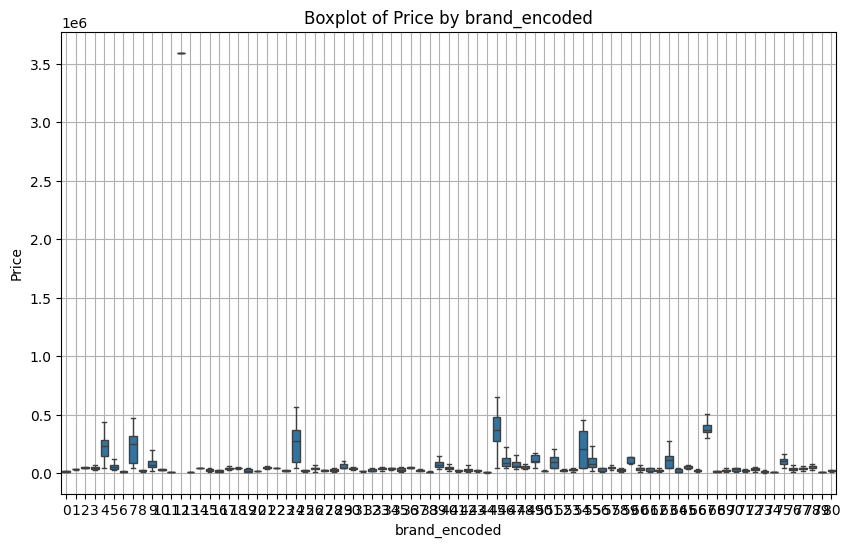

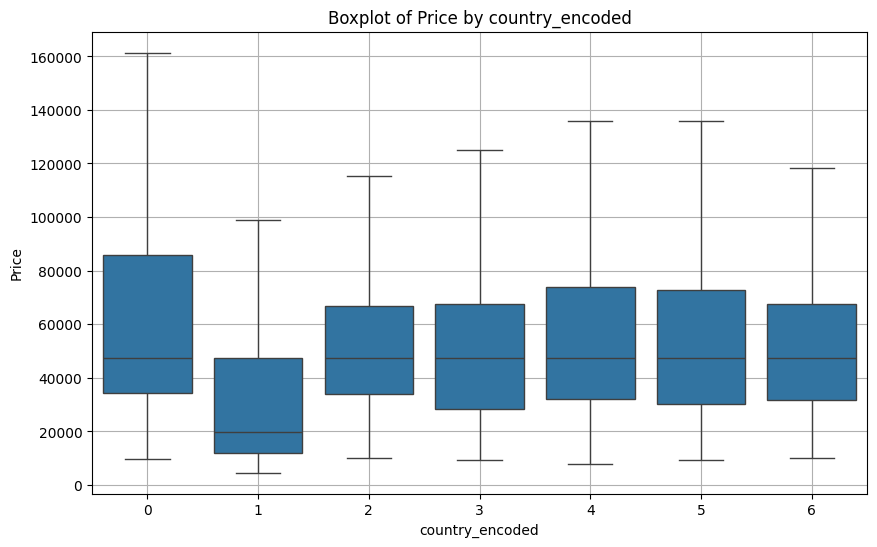

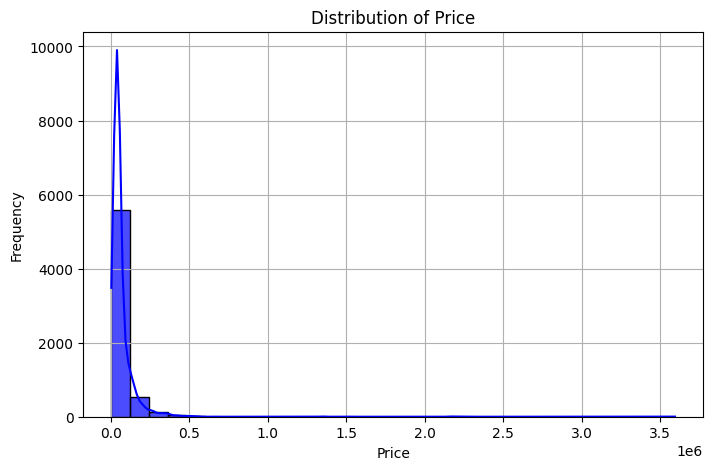

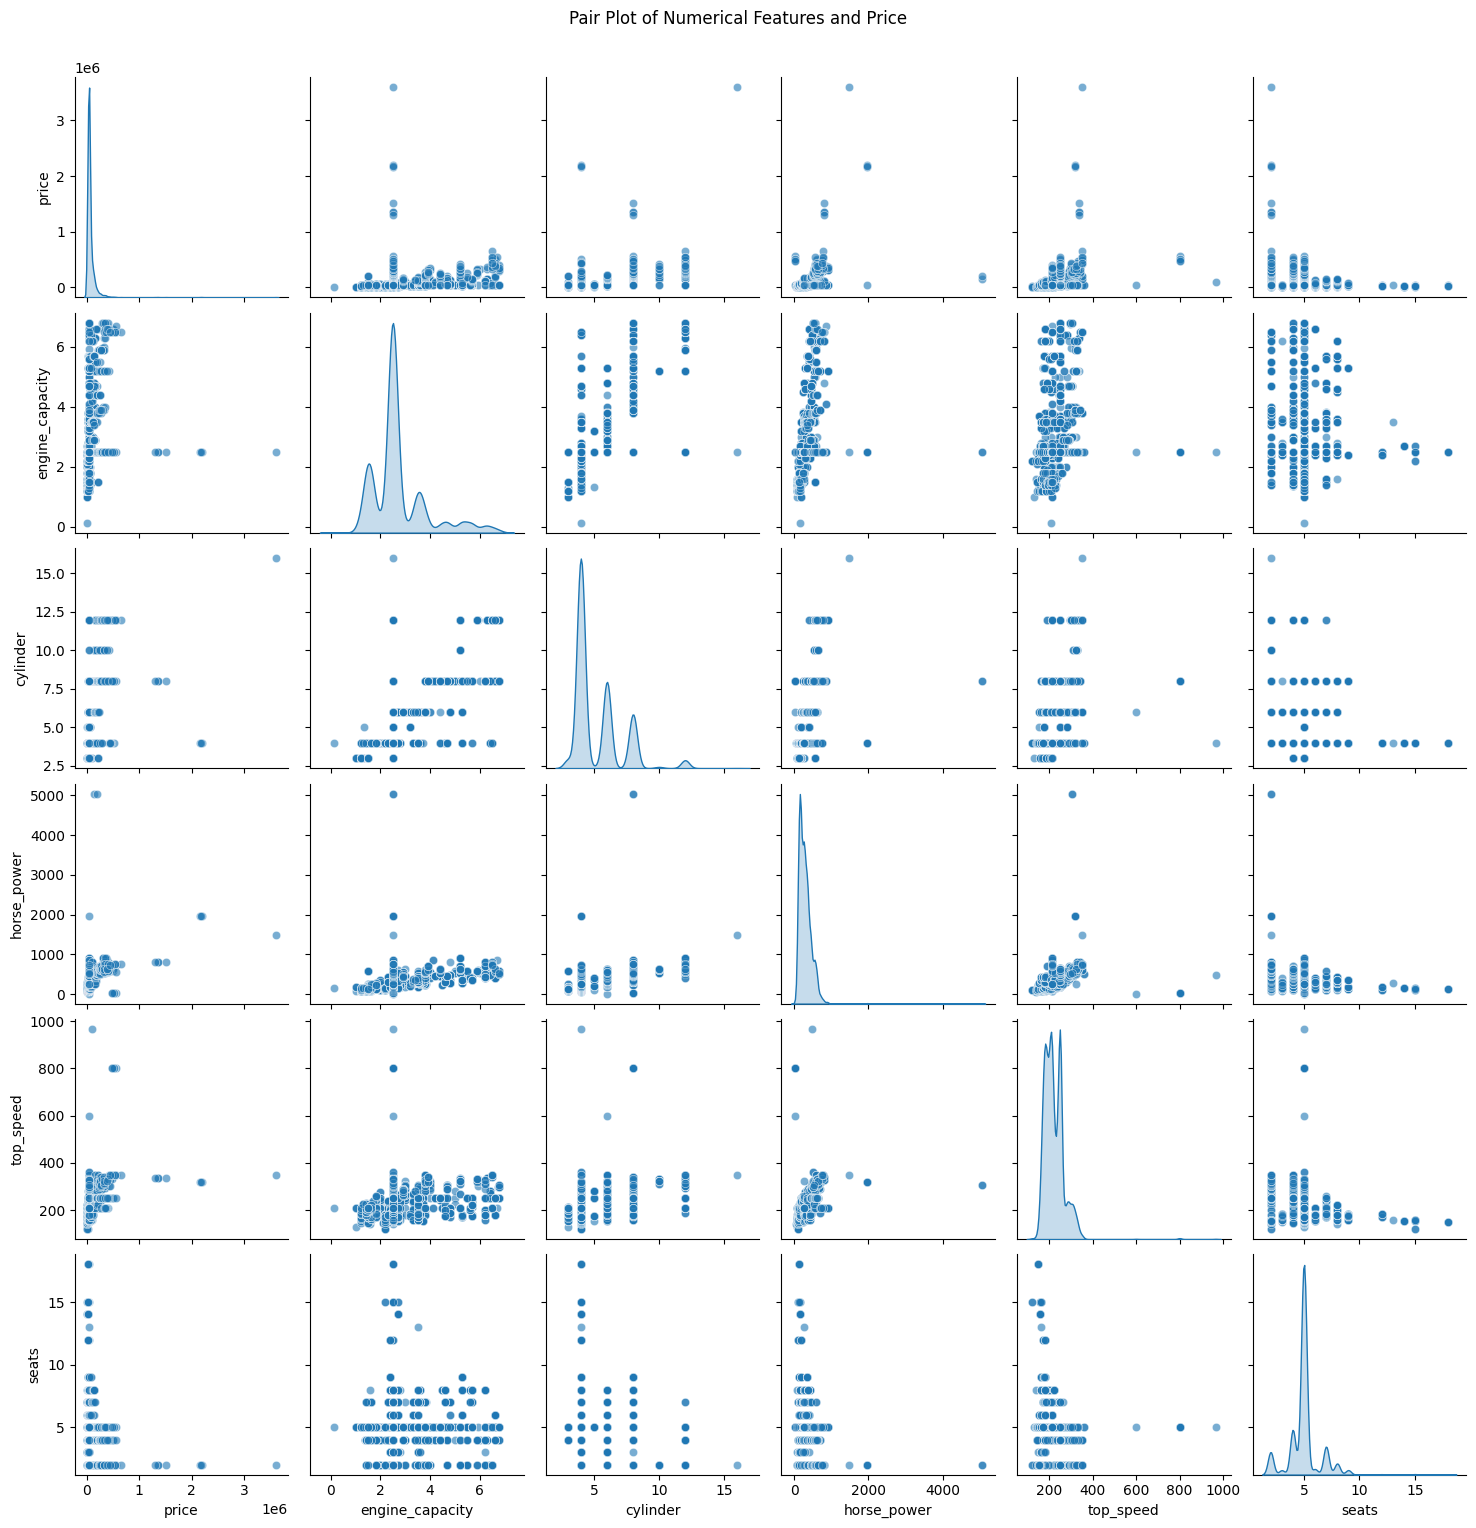

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for every numerical column with 'price'
numerical_columns = ['engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=cars_df, x=col, y='price', alpha=0.6)
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = cars_df[['price'] + numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

########################################################################
print("\n\n")

# Boxplots for categorical variables vs 'price'
categorical_columns = ['brand_encoded', 'country_encoded']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cars_df, x=col, y='price', showfliers=False)
    plt.title(f'Boxplot of Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
print("\n\n")
# Histogram/Distribution plot of 'price'
plt.figure(figsize=(8, 5))
sns.histplot(cars_df['price'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

####################
print("\n\n")

# Pair plot for numerical columns
sns.pairplot(cars_df[['price'] + numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Features and Price', y=1.02)
plt.show()


# **Models**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = cars_df.drop(columns=['price', 'car name', 'brand', 'country'])
y = cars_df['price']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) #60% Training Set 40% Temporary Set
#40% Temporary Set==> 20% Validation Set 20% Test Set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
X_train_mean, X_train_std = X_train.mean(), X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


In [ ]:
# Closed-form solution
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
theta_closed = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predictions
X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]
y_val_pred_closed = X_val_bias @ theta_closed

# Validation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_closed = mean_squared_error(y_val, y_val_pred_closed)
mae_closed = mean_absolute_error(y_val, y_val_pred_closed)
r2_closed = r2_score(y_val, y_val_pred_closed)

print(f"Closed-Form Solution: Validation MSE = {mse_closed}, MAE = {mae_closed}, R^2 = {r2_closed}")


Closed-Form Solution: Validation MSE = 2321536315.8777013, MAE = 24519.929032309097, R^2 = 0.4946698487050084


In [ ]:
# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= lr * gradients
    return theta

X_train_norm = (X_train - X_train.mean()) / X_train.std()  # Normalize for stability
X_train_bias = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
theta_gd = gradient_descent(X_train_bias, y_train.values)

# Predictions
X_val_norm = (X_val - X_train.mean()) / X_train.std()
X_val_bias = np.c_[np.ones((X_val_norm.shape[0], 1)), X_val_norm]
y_val_pred_gd = X_val_bias @ theta_gd

# Validation Metrics
mse_gd = mean_squared_error(y_val, y_val_pred_gd)
mae_gd = mean_absolute_error(y_val, y_val_pred_gd)
r2_gd = r2_score(y_val, y_val_pred_gd)

print(f"Gradient Descent: Validation MSE = {mse_gd}, MAE = {mae_gd}, R^2 = {r2_gd}")


Gradient Descent: Validation MSE = 2321233125.1447725, MAE = 24512.061467658266, R^2 = 0.494735844407033


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for degree in range(2, 11):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_val_pred_poly = model.predict(X_val_poly)
    mse_poly = mean_squared_error(y_val, y_val_pred_poly)
    r2_poly = r2_score(y_val, y_val_pred_poly)

    print(f"Degree {degree}: Validation MSE = {mse_poly}, R^2 = {r2_poly}")


Degree 2: Validation MSE = 2060623241.435173, R^2 = 0.5514629483783327
Degree 3: Validation MSE = 1530935515.3105724, R^2 = 0.6667603817852479
Degree 4: Validation MSE = 2070798317.5926342, R^2 = 0.5492481336718291
Degree 5: Validation MSE = 46014883032.20675, R^2 = -9.016086177697913
Degree 6: Validation MSE = 6.785181813588755e+19, R^2 = -14769344458.418995
Degree 7: Validation MSE = 3.1564037496441053e+19, R^2 = -6870562279.016302
Degree 8: Validation MSE = 1.0409706215218561e+18, R^2 = -226588675.67482677
Degree 9: Validation MSE = 2.5403056690893866e+17, R^2 = -55294979.28167351
Degree 10: Validation MSE = 1.4048858399049848e+16, R^2 = -3058022.1253585806


In [ ]:
from sklearn.svm import SVR

for C in [0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1, 1, 10]:
        model_rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        model_rbf.fit(X_train, y_train)

        y_val_pred_rbf = model_rbf.predict(X_val)
        mse_rbf = mean_squared_error(y_val, y_val_pred_rbf)
        r2_rbf = r2_score(y_val, y_val_pred_rbf)

        print(f"C = {C}, Gamma = {gamma}: Validation MSE = {mse_rbf}, R^2 = {r2_rbf}")


C = 0.1, Gamma = 0.01: Validation MSE = 4856024904.853706, R^2 = -0.05701374692225225
C = 0.1, Gamma = 0.1: Validation MSE = 4855529694.748041, R^2 = -0.056905954252412405
C = 0.1, Gamma = 1: Validation MSE = 4856378456.298978, R^2 = -0.05709070466963184
C = 0.1, Gamma = 10: Validation MSE = 4856488109.338258, R^2 = -0.057114572910051065
C = 1, Gamma = 0.01: Validation MSE = 4851741078.666741, R^2 = -0.05608128400087775
C = 1, Gamma = 0.1: Validation MSE = 4846739537.516805, R^2 = -0.0549925956488071
C = 1, Gamma = 1: Validation MSE = 4855297529.926985, R^2 = -0.05685541880166478
C = 1, Gamma = 10: Validation MSE = 4856396549.290337, R^2 = -0.05709464298151534
C = 10, Gamma = 0.01: Validation MSE = 4809177633.281166, R^2 = -0.04681647425001367
C = 10, Gamma = 0.1: Validation MSE = 4759830120.694551, R^2 = -0.03607497267156523
C = 10, Gamma = 1: Validation MSE = 4844578490.390342, R^2 = -0.05452219927210478
C = 10, Gamma = 10: Validation MSE = 4855482599.175237, R^2 = -0.056895702931867

In [ ]:
# Initialize the model_results dictionary
model_results = {}

# Closed-Form Solution
model_results['Linear Regression (Closed-Form)'] = {
    'mse': 2358569961.0891323,
    'mae': 24417.267949615478,
    'r2': 0.4866087137532503
}

# Gradient Descent
model_results['Linear Regression (Gradient Descent)'] = {
    'mse': 2355909689.109991,
    'mae': 24384.75135211928,
    'r2': 0.48718777669209434
}

# Polynomial Regression
model_results['Polynomial Regression (Degree 2)'] = {
    'mse': 2022317290.2450955,
    'r2': 0.5598010269076199
}
model_results['Polynomial Regression (Degree 3)'] = {
    'mse': 1469782267.6114888,
    'r2': 0.680071644547155
}
model_results['Polynomial Regression (Degree 4)'] = {
    'mse': 1349467283.3881614,
    'r2': 0.7062606766828174
}
model_results['Polynomial Regression (Degree 5)'] = {
    'mse': 642834980451.96,
    'r2': -138.92626163450234
}
model_results['Polynomial Regression (Degree 6)'] = {
    'mse': 6.095776431637102e+18,
    'r2': -1326871177.1038945
}
model_results['Polynomial Regression (Degree 7)'] = {
    'mse': 3.0741931287550493e+19,
    'r2': -6691613945.502012
}
model_results['Polynomial Regression (Degree 8)'] = {
    'mse': 1.5637881874220454e+18,
    'r2': -340390677.33601457
}
model_results['Polynomial Regression (Degree 9)'] = {
    'mse': 6.9265149990706456e+16,
    'r2': -15076984.220901398
}
model_results['Polynomial Regression (Degree 10)'] = {
    'mse': 2.1541934955807176e+16,
    'r2': -4689044.429077997
}

# RBF Kernel Regression (C, Gamma Combinations)
rbf_results = [
    {'C': 0.1, 'Gamma': 0.01, 'mse': 4855980131.772176, 'r2': -0.05700400113972526},
    {'C': 0.1, 'Gamma': 0.1, 'mse': 4855408445.154088, 'r2': -0.05687956178323694},
    {'C': 0.1, 'Gamma': 1, 'mse': 4856367580.910634, 'r2': -0.057088337417567026},
    {'C': 0.1, 'Gamma': 10, 'mse': 4856487647.62763, 'r2': -0.057114472409232064},
    {'C': 1, 'Gamma': 0.01, 'mse': 4851305479.327623, 'r2': -0.055986466841036364},
    {'C': 1, 'Gamma': 0.1, 'mse': 4845563252.649128, 'r2': -0.05473655304198499},
    {'C': 1, 'Gamma': 1, 'mse': 4855191705.003128, 'r2': -0.05683238382934186},
    {'C': 1, 'Gamma': 10, 'mse': 4856395050.287512, 'r2': -0.05709431669270426},
    {'C': 10, 'Gamma': 0.01, 'mse': 4804714235.561374, 'r2': -0.0458449238893297},
    {'C': 10, 'Gamma': 0.1, 'mse': 4748834794.065985, 'r2': -0.03368161357106336},
    {'C': 10, 'Gamma': 1, 'mse': 4843559970.294425, 'r2': -0.054300497414310867},
    {'C': 10, 'Gamma': 10, 'mse': 4855469324.415837, 'r2': -0.056892813407318776},
    {'C': 100, 'Gamma': 0.01, 'mse': 4392994662.115864, 'r2': 0.043774313560191014},
    {'C': 100, 'Gamma': 0.1, 'mse': 4052035796.5939627, 'r2': 0.11799102682939999},
    {'C': 100, 'Gamma': 1, 'mse': 4737816338.605033, 'r2': -0.03128322000425232},
    {'C': 100, 'Gamma': 10, 'mse': 4846295398.511366, 'r2': -0.05489591965486307}
]

for r in rbf_results:
    model_name = f"RBF Kernel (C={r['C']}, Gamma={r['Gamma']})"
    model_results[model_name] = {
        'mse': r['mse'],
        'r2': r['r2']
    }

# Output
model_results


{'Linear Regression (Closed-Form)': {'mse': 2358569961.0891323,
  'mae': 24417.267949615478,
  'r2': 0.4866087137532503},
 'Linear Regression (Gradient Descent)': {'mse': 2355909689.109991,
  'mae': 24384.75135211928,
  'r2': 0.48718777669209434},
 'Polynomial Regression (Degree 2)': {'mse': 2022317290.2450955,
  'r2': 0.5598010269076199},
 'Polynomial Regression (Degree 3)': {'mse': 1469782267.6114888,
  'r2': 0.680071644547155},
 'Polynomial Regression (Degree 4)': {'mse': 1349467283.3881614,
  'r2': 0.7062606766828174},
 'Polynomial Regression (Degree 5)': {'mse': 642834980451.96,
  'r2': -138.92626163450234},
 'Polynomial Regression (Degree 6)': {'mse': 6.095776431637102e+18,
  'r2': -1326871177.1038945},
 'Polynomial Regression (Degree 7)': {'mse': 3.0741931287550493e+19,
  'r2': -6691613945.502012},
 'Polynomial Regression (Degree 8)': {'mse': 1.5637881874220454e+18,
  'r2': -340390677.33601457},
 'Polynomial Regression (Degree 9)': {'mse': 6.9265149990706456e+16,
  'r2': -150769

In [ ]:
# Model Selection: Identify the best model based on MSE and R²
best_model_mse = None
best_model_r2 = None
lowest_mse = float('inf')
highest_r2 = float('-inf')

# Iterate through model_results to find the best model
for model_name, metrics in model_results.items():
    mse = metrics.get('mse', float('inf'))
    r2 = metrics.get('r2', float('-inf'))

    # Check for the lowest MSE
    if mse < lowest_mse:
        lowest_mse = mse
        best_model_mse = model_name

    # Check for the highest R²
    if r2 > highest_r2:
        highest_r2 = r2
        best_model_r2 = model_name

# Output the best models
print(f"Best Model Based on Lowest MSE: {best_model_mse} (MSE = {lowest_mse})")
print(f"Best Model Based on Highest R²: {best_model_r2} (R² = {highest_r2})")


Best Model Based on Lowest MSE: Polynomial Regression (Degree 4) (MSE = 1349467283.3881614)
Best Model Based on Highest R²: Polynomial Regression (Degree 4) (R² = 0.7062606766828174)


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize
selected_features = []
remaining_features = list(X_train.columns)
best_mse = float('inf')
max_features = 5  # You can adjust this limit as needed

# Forward Selection Loop
for _ in range(max_features):
    feature_to_add = None

    for feature in remaining_features:
        # Try adding the feature to the current set
        current_features = selected_features + [feature]

        # Prepare polynomial features for the current subset
        poly = PolynomialFeatures(degree=4, include_bias=False)
        X_train_poly = poly.fit_transform(X_train[current_features])
        X_val_poly = poly.transform(X_val[current_features])

        # Train and evaluate the model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_val_pred = model.predict(X_val_poly)
        mse = mean_squared_error(y_val, y_val_pred)

        # Check if this feature improves performance
        if mse < best_mse:
            best_mse = mse
            feature_to_add = feature

    # If no feature improves performance, stop the process
    if feature_to_add is None:
        break

    # Add the best feature to the selected set
    selected_features.append(feature_to_add)
    remaining_features.remove(feature_to_add)

    print(f"Added feature: {feature_to_add}")
    print(f"Current feature set: {selected_features}")
    print(f"Validation MSE: {best_mse}")

# Final Selected Features
print("\nFinal selected features:")
print(selected_features)


Added feature: horse_power
Current feature set: ['horse_power']
Validation MSE: 2207509006.6887364
Added feature: seats
Current feature set: ['horse_power', 'seats']
Validation MSE: 1822208960.132979
Added feature: top_speed
Current feature set: ['horse_power', 'seats', 'top_speed']
Validation MSE: 1528352018.3613832
Added feature: brand_encoded
Current feature set: ['horse_power', 'seats', 'top_speed', 'brand_encoded']
Validation MSE: 1253870864.3033564
Added feature: cylinder
Current feature set: ['horse_power', 'seats', 'top_speed', 'brand_encoded', 'cylinder']
Validation MSE: 995733296.8385658
Added feature: engine_capacity
Current feature set: ['horse_power', 'seats', 'top_speed', 'brand_encoded', 'cylinder', 'engine_capacity']
Validation MSE: 844911102.9917625
Added feature: car_name_encoded
Current feature set: ['horse_power', 'seats', 'top_speed', 'brand_encoded', 'cylinder', 'engine_capacity', 'car_name_encoded']
Validation MSE: 785738890.1791928

Final selected features:
['ho

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Selected features
selected_features = ['horse_power', 'seats', 'engine_capacity', 'top_speed', 'brand_encoded']

# Normalize the data
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Define lambda values for grid search
lambda_values = np.logspace(-2, 2, 50)  # From 0.01 to 100

# Results dictionaries
lasso_results = {}
ridge_results = {}

# LASSO Regularization
print("LASSO Regularization:")
for lam in lambda_values:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_train_selected, y_train)
    y_val_pred = lasso.predict(X_val_selected)
    mse = mean_squared_error(y_val, y_val_pred)
    lasso_results[lam] = mse
    print(f"λ = {lam:.2f}, Validation MSE = {mse:.4f}")

# Find the best λ for LASSO
optimal_lambda_lasso = min(lasso_results, key=lasso_results.get)
print(f"\nOptimal λ for LASSO: {optimal_lambda_lasso:.2f}")
print(f"Lowest Validation MSE (LASSO): {lasso_results[optimal_lambda_lasso]:.4f}")

# Ridge Regularization
print("\nRidge Regularization:")
for lam in lambda_values:
    ridge = Ridge(alpha=lam, max_iter=10000)
    ridge.fit(X_train_selected, y_train)
    y_val_pred = ridge.predict(X_val_selected)
    mse = mean_squared_error(y_val, y_val_pred)
    ridge_results[lam] = mse
    print(f"λ = {lam:.2f}, Validation MSE = {mse:.4f}")

# Find the best λ for Ridge
optimal_lambda_ridge = min(ridge_results, key=ridge_results.get)
print(f"\nOptimal λ for Ridge: {optimal_lambda_ridge:.2f}")
print(f"Lowest Validation MSE (Ridge): {ridge_results[optimal_lambda_ridge]:.4f}")


LASSO Regularization:
λ = 0.01, Validation MSE = 2428126525.1888
λ = 0.01, Validation MSE = 2428126529.1562
λ = 0.01, Validation MSE = 2428126533.9442
λ = 0.02, Validation MSE = 2428126539.7223
λ = 0.02, Validation MSE = 2428126522.6072
λ = 0.03, Validation MSE = 2428126531.0224
λ = 0.03, Validation MSE = 2428126541.1781
λ = 0.04, Validation MSE = 2428126553.4342
λ = 0.04, Validation MSE = 2428126568.2251
λ = 0.05, Validation MSE = 2428126586.0754
λ = 0.07, Validation MSE = 2428126607.6179
λ = 0.08, Validation MSE = 2428126633.6166
λ = 0.10, Validation MSE = 2428126664.9935
λ = 0.12, Validation MSE = 2428126702.8618
λ = 0.14, Validation MSE = 2428126748.5652
λ = 0.17, Validation MSE = 2428126803.7257
λ = 0.20, Validation MSE = 2428126823.1314
λ = 0.24, Validation MSE = 2428126903.4880
λ = 0.29, Validation MSE = 2428127000.4804
λ = 0.36, Validation MSE = 2428127117.5572
λ = 0.43, Validation MSE = 2428127258.8843
λ = 0.52, Validation MSE = 2428127429.4944
λ = 0.63, Validation MSE = 24281

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Combine training and validation data for final model training
X_train_val = pd.concat([X_train_selected, X_val_selected])
y_train_val = pd.concat([y_train, y_val])

# Refine lambda range for grid search
refined_lambda_values = np.linspace(90, 110, 21)  # Narrow range around λ=100

# Results dictionaries for refined grid search
lasso_refined_results = {}
ridge_refined_results = {}

# LASSO Hyperparameter Tuning
print("LASSO Refined Grid Search:")
for lam in refined_lambda_values:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_train_val, y_train_val)
    y_test_pred = lasso.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    lasso_refined_results[lam] = (mse, r2)
    print(f"λ = {lam:.2f}, Test MSE = {mse:.4f}, R^2 = {r2:.4f}")

# Best λ for LASSO
optimal_lambda_lasso = min(lasso_refined_results, key=lambda x: lasso_refined_results[x][0])
lasso_best_mse, lasso_best_r2 = lasso_refined_results[optimal_lambda_lasso]
print(f"\nBest λ for LASSO: {optimal_lambda_lasso:.2f}")
print(f"LASSO Test MSE: {lasso_best_mse:.4f}, R^2: {lasso_best_r2:.4f}")

# Ridge Hyperparameter Tuning
print("\nRidge Refined Grid Search:")
for lam in refined_lambda_values:
    ridge = Ridge(alpha=lam, max_iter=10000)
    ridge.fit(X_train_val, y_train_val)
    y_test_pred = ridge.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    ridge_refined_results[lam] = (mse, r2)
    print(f"λ = {lam:.2f}, Test MSE = {mse:.4f}, R^2 = {r2:.4f}")

# Best λ for Ridge
optimal_lambda_ridge = min(ridge_refined_results, key=lambda x: ridge_refined_results[x][0])
ridge_best_mse, ridge_best_r2 = ridge_refined_results[optimal_lambda_ridge]
print(f"\nBest λ for Ridge: {optimal_lambda_ridge:.2f}")
print(f"Ridge Test MSE: {ridge_best_mse:.4f}, R^2: {ridge_best_r2:.4f}")

# Report the best model
if lasso_best_mse < ridge_best_mse:
    print(f"\nBest Model: LASSO with λ = {optimal_lambda_lasso:.2f}")
    print(f"Test MSE: {lasso_best_mse:.4f}, R^2: {lasso_best_r2:.4f}")
else:
    print(f"\nBest Model: Ridge with λ = {optimal_lambda_ridge:.2f}")
    print(f"Test MSE: {ridge_best_mse:.4f}, R^2: {ridge_best_r2:.4f}")


LASSO Refined Grid Search:
λ = 90.00, Test MSE = 7652756894.2750, R^2 = 0.3755
λ = 91.00, Test MSE = 7652813084.2863, R^2 = 0.3755
λ = 92.00, Test MSE = 7652869280.5438, R^2 = 0.3755
λ = 93.00, Test MSE = 7652925483.0474, R^2 = 0.3755
λ = 94.00, Test MSE = 7652981691.7972, R^2 = 0.3755
λ = 95.00, Test MSE = 7653037906.7932, R^2 = 0.3755
λ = 96.00, Test MSE = 7653094128.0354, R^2 = 0.3755
λ = 97.00, Test MSE = 7653150355.5237, R^2 = 0.3755
λ = 98.00, Test MSE = 7653206589.2581, R^2 = 0.3755
λ = 99.00, Test MSE = 7653262829.2388, R^2 = 0.3755
λ = 100.00, Test MSE = 7653319075.4656, R^2 = 0.3755
λ = 101.00, Test MSE = 7653375327.9385, R^2 = 0.3755
λ = 102.00, Test MSE = 7653431586.6577, R^2 = 0.3755
λ = 103.00, Test MSE = 7653537540.7220, R^2 = 0.3755
λ = 104.00, Test MSE = 7653592508.4011, R^2 = 0.3755
λ = 105.00, Test MSE = 7653647482.2433, R^2 = 0.3755
λ = 106.00, Test MSE = 7653702462.2485, R^2 = 0.3755
λ = 107.00, Test MSE = 7653757448.4167, R^2 = 0.3755
λ = 108.00, Test MSE = 765381

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Polynomial Features (Degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 2: Grid Search for Hyperparameter Tuning (LASSO Example)
lasso = Lasso(max_iter=5000)
param_grid = {'alpha': [0.1, 1, 10, 50, 100, 200, 500]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Best Hyperparameter
best_lasso = grid_search.best_estimator_
print(f"Best λ for LASSO: {grid_search.best_params_['alpha']}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+12, tolerance: 3.436e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+12, tolerance: 3.282e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+12, tolerance: 3.265e

Best λ for LASSO: 500


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.753e+12, tolerance: 3.641e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features (Degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Train LASSO on Full Training Data
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=200, max_iter=10000)
lasso.fit(X_train_poly, y_train)

# Test Predictions
y_test_pred = lasso.predict(X_test_poly)

# Evaluate on Test Set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")



Test MSE: 7879733273.269059
Test R^2: 0.35702461199489


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+12, tolerance: 3.641e+09
  model = cd_fast.enet_coordinate_descent(
